In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

from sklearn.decomposition import PCA, KernelPCA

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

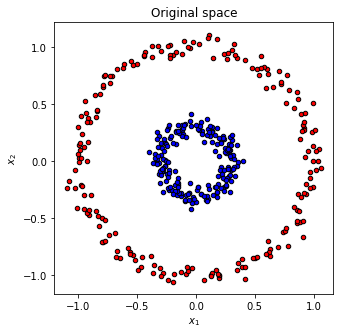

In [2]:
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure()
plt.figure(figsize=(5, 5))
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

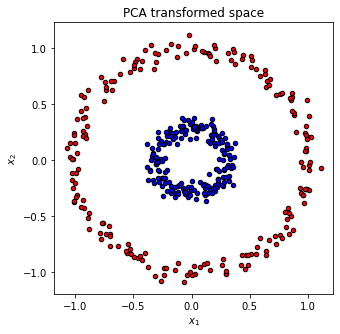

In [3]:
X_pca = PCA(n_components=2).fit_transform(X)


reds = y == 0
blues = y == 1

plt.figure()
plt.figure(figsize=(5, 5))
plt.title("PCA transformed space")
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y)

estimators = [
    ('DecisionStump', DecisionTreeClassifier(max_depth=1)),
    ('LogisticRegression',LogisticRegression()),
    ('SVC_lin', SVC(kernel='linear')),
]

for ename, emodel in estimators:
    print(ename, ': ', emodel.fit(X_train, y_train).score(X_test, y_test))


DecisionStump :  0.69
LogisticRegression :  0.42
SVC_lin :  0.62


Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

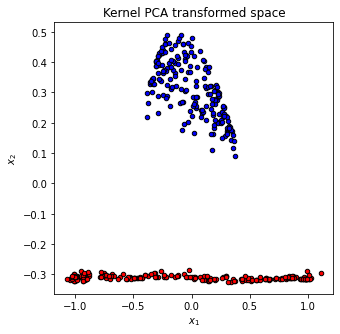

In [5]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)


reds = y == 0
blues = y == 1

plt.figure()
plt.figure(figsize=(5, 5))
plt.title("Kernel PCA transformed space")
plt.scatter(X_pca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_kpca, y, stratify=y)

estimators = [
    ('DecisionStump', DecisionTreeClassifier(max_depth=1)),
    ('LogisticRegression',LogisticRegression()),
    ('SVC_lin', SVC(kernel='linear')),
]

for ename, emodel in estimators:
    print(ename, ': ', emodel.fit(X_train, y_train).score(X_test, y_test))

DecisionStump :  1.0
LogisticRegression :  1.0
SVC_lin :  1.0
